The first few rows of the dataset:
      long_hair    forehead_width_cm    forehead_height_cm    nose_wide    nose_long    lips_thin    distance_nose_to_lip_long  gender
--  -----------  -------------------  --------------------  -----------  -----------  -----------  ---------------------------  --------
 0            1                 11.8                   6.1            1            0            1                            1  Male
 1            0                 14                     5.4            0            0            1                            0  Female
 2            0                 11.8                   6.3            1            1            1                            1  Male
 3            0                 14.4                   6.1            0            1            1                            1  Male
 4            1                 13.5                   5.9            0            0            0                            0  Female
Accuracy: 0.961616161616

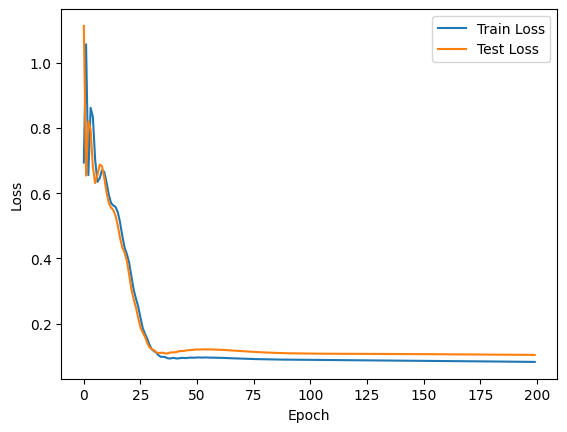

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

data = pd.read_csv('genderTrain.csv')

print("The first few rows of the dataset:")
print(tabulate(data.head(), headers='keys', tablefmt='fancygrid'))

X = data.drop('gender', axis=1)  
y = data['gender']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train_encoded.reshape(-1, 1))
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.Tensor(y_test_encoded.reshape(-1, 1))

input_size = X_train.shape[1]
hidden_size = 64
output_size = 1 

X_train_tensor = torch.Tensor(X_train.values)
X_test_tensor = torch.Tensor(X_test.values)

learning_rate = 0.01
num_epochs = 200

net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    
    net.train()
    
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    net.eval()

    with torch.no_grad():
        test_outputs = net(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()